In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
data_dir   = '/Volumes/TI27457/ttb/circuits/aes-logs'
counter_df = load_data_df(data_dir)

In [3]:
# Split Data by Counter Type
ctype_groups = counter_df.groupby('Counter Type')
cdd_df       = ctype_groups.get_group('cdd')
cdn_df       = ctype_groups.get_group('cdn')
cnd_df       = ctype_groups.get_group('cnd')
cnn_df       = ctype_groups.get_group('cnn')
ddd_df       = ctype_groups.get_group('ddd')
ddn_df       = ctype_groups.get_group('ddn')
dnd_df       = ctype_groups.get_group('dnd')
dnn_df       = ctype_groups.get_group('dnn')
tjfree_df    = ctype_groups.get_group('tjfree')

# Plot Settings

In [14]:
# Plot Settings
FIG_WIDTH                = 12
FIG_HEIGHT               = 6
AXIS_LABEL_FONTSIZE      = 16
AXIS_TICK_LABEL_FONTSIZE = 14
LEGEND_FONTSIZE          = 12
SAVE_AS_PDF              = True
PDF_FILENAME             = 'ttb_false_positives.pdf'
CTYPES = ['CDD', 'CDN', 'CND', 'CNN', 'DDD', 'DDN', 'DND', 'DNN', 'TJFREE']

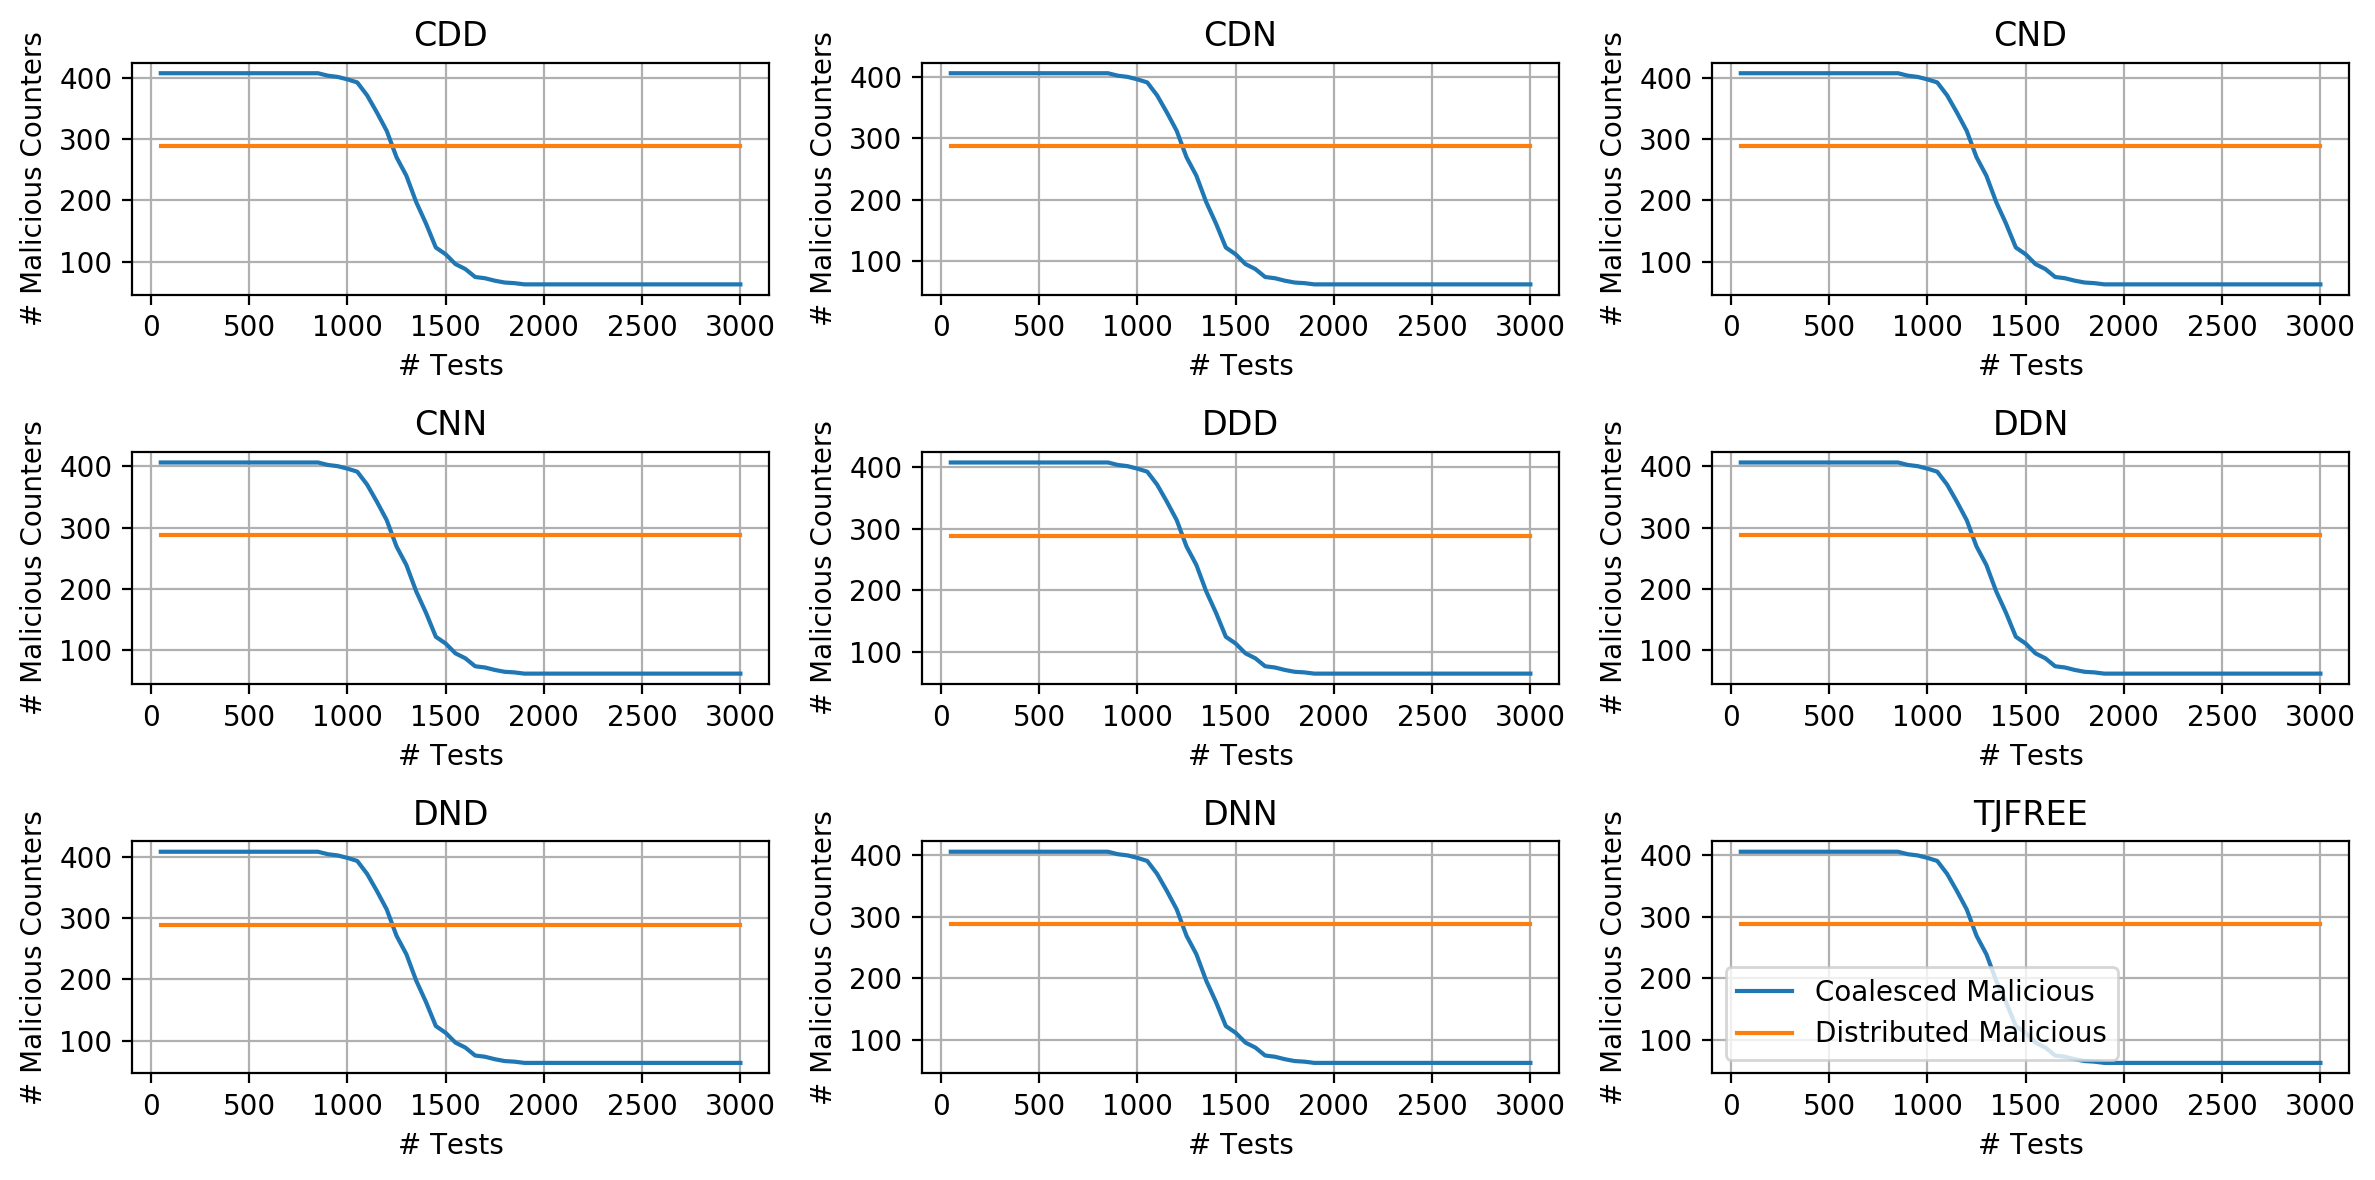

In [21]:
# Plot Net Blockage - Point Plot
fig, axes = plt.subplots(3, 3, figsize=(FIG_WIDTH,FIG_HEIGHT), dpi=200)

for i in range(len(axes.flat)):
    ax    = axes.flat[i]
    ctype = CTYPES[i]
    df    = ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="# Tests", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="# Tests", y="Distributed Malicious", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('# Tests')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Distributed Malicious"])
plt.tight_layout(h_pad=1)

# if SAVE_AS_PDF:
#     plt.savefig(PDF_FILENAME, format='pdf')